# Travelling to Alpha Centauri

This notebook performs calculations to evaluate the feasibility of travelling to alpha centauri using a laser array to propel fuel pellets to a craft which are then burnt to accelerate the craft up to speeds of the order 0.1c

__Section 1__ uses the work done in Breakthrough starshot to calculate the various quantities associated with purely using the laser to accelerate a craft with a photon sail up to some speed

__Section 2__ Takes the most simple model of a constantly accelerating craft, which receives fuel pellets at regular intervals of $t_b$. 

__Section 3__ addresses some of the inaccuracies with this model by sending up variable mass payloads to the craft

__Section 4__ takes the two previous models and makes them continuous

## Section 1

In [1]:
from __future__ import division 
import numpy

__Calculating $v_0$ and $t_0$__

This section calculates time taken for the size of the laser beam, which spreads due to diffraction, to equal the size of the sail, $t_0$, and the velocity of the spacecraft at this point, $v_0$. 

Constant values:

In [2]:
c = 2.99792458e8
AU = 1.496e11
YEAR_S = 3.154e7
S_AC = 4.367

In [3]:
# Laser Array Specification
d = 10e3
wavelength = 1e-6
P_0_Laser = 70e9       # input laser power  

# Sail Specification
h = 1e-6
rho = 1.4e3

def starshot(P, M):
    # This function calculates the acceleration of the craft during its constant acceleration period, its final velocity 
    # its displacment the time it takes and the total journey time subject to the above specifications
    
    m_s = M / 2
    D = numpy.sqrt( m_s / (h * rho))
    L_0 = d * D / (2 * wavelength)
    a_0 = 2 * P / ( M * c)
    v_0 = numpy.sqrt( 2 * a_0 * L_0 )
    t_0 = v_0 / a_0
    journey_time = ((S_AC * c * YEAR_S - L_0) / v_0 + t_0) 
    
    return t_0 , L_0 , v_0 , a_0, journey_time, D  


In [4]:
print P_0_Laser / d**2

# input Spacecraft mass - this includes sail mass and payload mass
m_spacecraft = 200                              

t_0, L_0, v_0, a_0, journey_time, D = starshot(P_0_Laser , m_spacecraft)

print D
"t_0 = %.4f years, L_0 = %.1f AU, v_0 = %.4f c, a_0 = %.1f m/s^2, journey time = %.2f Years" % (t_0 / YEAR_S, L_0 / AU, v_0/c , a_0, journey_time / YEAR_S)

700.0
267.261241912


't_0 = 0.0339 years, L_0 = 8.9 AU, v_0 = 0.0083 c, a_0 = 2.3 m/s^2, journey time = 524.10 Years'

## Section 2 - Constant Acceleration, Fixed Mass and Cadence Model

http://localhost:8888/notebooks/Constant%20Acceleration%20Model.ipynb

Here we are using a simple model of a constantly accelerating spacecraft to calculate how often pellets will need to be launched to get the spacecraft up to 0.1c within a certain time frame. 

In [5]:
c = 2.99792458e8
AU = 1.496e11
YEAR_S = 3.154e7
S_AC = 4.367 # distance to alpha centauri in light years

In [6]:
import sympy
from sympy import *
from __future__ import division 
init_printing(use_unicode=True)

Based on the overall desired journey time and the desired top speed, we can calculate the acceleration the spacecraft needs, how long it needs to accelerate for, and the distance over which it accelerated to fulfill these constraints. 

This is done by solving the following (SUVAT) equations:

$
s_{ac} = ut_a + \frac{1}{2} a t_a^2 + v_{max} (t_{j} - t_a)
$

$
v_{max} = u + a t_a
$

$
v^2 = u^2 + 2as_a
$

where $u$ is the initial velocity (taken to be zero below), $s_{ac}$ is the distance to alpha centauri, $a$ is the acceleration of the space craft during its acceleration phase, $t_a$ is the time for which this acceleration lasts, $v_{max}$ is the desired maximum velocity, $t_j$ is the total journey time.

In [7]:
t_j = 50                                 # time for journey in years
av_v = S_AC * YEAR_S / (t_j * YEAR_S)    # average velocity of spacecraft if it is to complete the journey 
"av_v = %.3f c" % (av_v)                 # in the requried time, given in units of c

'av_v = 0.087 c'

Please enter a $v_{max}$ that is larger than the $v_{av}$, to allow the spacecraft some acceleration time: 

In [8]:
# desired top speed
v_max = 0.1 * c    

# the variables to be solved for  
t_a, a, s_a = symbols('t_a a s_a') 

# enter desired units here in symbols bracket
t_unit, a_unit, s_unit = symbols('years ms^{-2} AU') 

Eq1 = Eq(S_AC * c * YEAR_S, -0.5 * a * t_a**2 + v_max * (t_j * YEAR_S))
Eq2 = Eq(a, v_max / t_a) 
Eq3 = Eq(v_max**2, 2* a * s_a)

solns_ta_a_sa = solve([Eq1, Eq2, Eq3], (t_a, a, s_a))
Eq_ta = Eq(t_a, (solns_ta_a_sa[0][0] / YEAR_S).round(3) * t_unit )
Eq_a = Eq(a, solns_ta_a_sa[0][1].round(4) * a_unit)
Eq_sa = Eq(s_a, (solns_ta_a_sa[0][2] / AU).round(1) * s_unit)

Eq_ta, Eq_a, Eq_sa

In [9]:
# Calculate Joruney Time

(S_AC * c * YEAR_S - solns_ta_a_sa[0][2]) / (v_max * YEAR_S) + solns_ta_a_sa[0][0] / YEAR_S
# 0.2 * solns_ta_a_sa[0][0]/YEAR_S + 0.4 * (55-solns_ta_a_sa[0][0]/YEAR_S )

There is obviously a play-off here between the desired maximum velocity and the acceleration. Demanding a lower maximum velocity for the same journey time demands a larger acceleration. This puts more emphasis on the thurst capabilities of the engine, and also means the

In [10]:
m_spacecraft = 100
m, v_e, T, dm_dt = symbols('m, v_e T dm/dt')                # defining symbol to define total mass of spacecraft

                  # Just an average exhaust velocty based on numbers found on the web

thrust_expr = m * a
thrust = thrust_expr.subs([(a, solns_ta_a_sa[0][1]), (m, m_spacecraft)])   # enter value for total mass of spacecraft 
thrust_eq = Eq(T, thrust.round(2))

dm_dt_expr = T / v_e
dm_dt_val = dm_dt_expr.subs([(T, thrust), (v_e, 3700)])
dm_dt_eq = Eq(dm_dt, dm_dt_val.round(4)) # enter value for exhaust velocity - this will vary depending on engine type

thrust_eq, dm_dt_eq
#"thrust = %.2f N, dm_dt = %.4f" % (thrust, dm_dt)

Here, I plan to include data on the different types of rocket engines. From a plot of their thrust vs mass, I will be able to deduce the mass of the rocket necessary to provide the above thrust. From that mass, it may be possible to rule out certain rocket engine types, based on the fraction of the total spacecraft mass they would be. If there are multiple options, further analysis will be done to evaluate which is optimal. Since the rocket engine will be firing for a prolonged period, coking will be a very important aspect to consider.

Doing a very quick analysis with Excel, with the numbers given above, I have calculated the mass of the engine.

In [11]:
m_engine = 130

Defining the mass of the fuel pellet, we will get a burn time:

In [12]:
m_p, t_b, n_b = symbols('m_p t_b n_b')

t_b_expr = m_p / dm_dt  # calculating burn time
t_b_val = t_b_expr.subs([(m_p , (m_spacecraft * 0.1)), (dm_dt, dm_dt_val)]) 
t_b_eq = Eq(t_b, t_b_val.round(1))

n_b_expr = t_a / t_b
n_b_val = n_b_expr.subs([(t_a, solns_ta_a_sa[0][0]), (t_b, t_b_val.round(0))])
n_b_eq = Eq(n_b, n_b_val.round(1))

t_b_eq, n_b_eq                         

__Wording How the Pellets are accelerated__

http://localhost:8888/notebooks/Wording%20How%20the%20pellets%20are%20accelerated.ipynb

In [13]:
v_p_last_expr = v_max - a * t_b                               # The velocity the last pellet has to reach 
v_p_last = v_p_last_expr.subs(a, solns_ta_a_sa[0][1])  

a_p, P_0 = symbols('a_p P_0')
P_0_unit, a_p_unit = symbols('GW Kms^{-2}')

a_p_expr = v_p_last / (t_b/2)
a_p_val = a_p_expr.subs(t_b, t_b_val)

P_0_expr = a_p * m_p * c / 2 
P_0_val = P_0_expr.subs([(m_p, (m_spacecraft * 0.1)), (a_p, a_p_val)])       # here I have doubled the mass from before since it is also important
                                                             # to consider the sail mass

Eq(a_p, (a_p_val/1000).round(1)*a_p_unit), Eq(P_0, (P_0_val / 1e9).round(1)*P_0_unit)

In [14]:
# What about the total laser shine time? 
((t_b_val/2) / 2 * n_b_val) / YEAR_S

In [15]:
# with a 70 GW laser, what speed can we get a fuel pellet of 10kg up to?

F_L2 = 2 * 70e9 / c 
F_L2 / 10 * (t_b_val / 2)  / c

A check that needs to be performed, is one to see if the laser dot size completely fills the sail carrying the fuel pellets for the entire journey. 

The inefficiency with this model: The laser array is not in use all the time - earlier pellets take little time to accelerate.

It has however given us a baseline specification for the laser array (estimate 70TW for 100kg to 0.1C in 4 years).

## Section 3 - Fixed Cadence, Variable Mass Model

To address the inefficiency of the laser sitting idle for large periods of time, in this model the rocket will again recieve pellets at regular intervals, however the mass of fuel it receives from the pellet is going to be variable. 

1. The maximum amount of fuel that can be launched will be calculated.

2. The size of the rocket engine will be determined by the rate at which the fuel needs to be burnt such that all of it is burnt at the end the fixed time interval.

3. The change in speed this produces will be calculated using the rocket equation, since here the mass of the engine will be comparable to the size of the rocket.

4. The amount of fuel that can be launched given the new speed of the rocket will be calculated. 

5. The new necessary size of the rocket engine will be calculated, and the extra mass from the previous engine will be jetisoned. 

6. the change in speed will again be calculated using the rocket equation, and so on.......

Lets first say that our engine is capable of producing 4 times the thrust it was in the previous case, and therefore is able to burn fuel at 4 times the rate. This incurs a very small mass penalty in terms of needing a larger rocket engine mass. 

We will take the receding velocity of the spacecraft to be equal to that of the change in velocity of an object in low Earth orbit to get on a Hohmann transfer orbit trajectory to Mars, $11.3kms^{-1}$.

In [16]:
v_0_receding = 11.3e3    

Now the question is what mass of pellet can I launch for the spacecraft to catch, assuming the laser is switched on for the entire time i.e. the laser has time $t_b/2$ to launch the next mass pellet. 

Using

$
v = at 
$

$
F = ma 
$

$
F = \frac{2P_0}{c}
$

Rather than using the EXCEL plot here just going to take the engine with the highest thrust to weight ratio (Merlin 1D), with T/W ratio of 180.1

In [17]:
Delta_v, m_wet, m_dry, v_0 = symbols('\Deltav m_wet m_dry v_0')
v_final_expr = v_0 + v_e * log(m_wet/m_dry) # Rocket Equation 
v_func = lambdify([v_0, v_e, m_wet, m_dry], v_final_expr, "math")

In [18]:
n_b_val = int(n_b_val)

In [19]:
import numpy

v_e_vals = numpy.logspace(3.57, 5, 5)

v_ve = numpy.zeros((len(v_e_vals), n_b_val + 1))
x_ve = numpy.zeros((len(v_e_vals), n_b_val + 1))
t_ve = numpy.zeros((len(v_e_vals), n_b_val + 1))
m_fuel_ve = numpy.zeros((len(v_e_vals), n_b_val + 1))


for j in range(len(v_e_vals)):
    v_e_val = v_e_vals[j]
    
    t_b_desired = t_b_val                               
    TW_ratio = 180.1
    g = 9.81
    m_spacecraft = 100
    v_receding = 11.3e3

    m_launched_expr = 2 * P_0 * (t_b/2) / (c * v_0)             
    m_func = lambdify([P_0, t_b, v_0], m_launched_expr, "numpy")

    T_0_expr = dm_dt * v_e         # Beware: there is another expression for thrust in the FCFM model , thrust_expr                                      
    T_func = lambdify([dm_dt, v_e], T_0_expr, "numpy")

    m_launched = m_func(P_0_val, t_b_desired, 11.3e3)
    m_fuel = m_launched / 2
    dm_dt_0 = m_fuel / t_b_desired
    T_0 = T_func(dm_dt_0, v_e_val)
    m_engine = T_0 / (TW_ratio * g)

    x_0 = 0
    
    v_vals = numpy.zeros(n_b_val + 1)
    v_vals[0] = v_receding
    
    t_vals = numpy.zeros(n_b_val + 1)
    t_vals[0] = 0
    
    m_fuel_vals = numpy.zeros(n_b_val + 1)
    m_fuel_vals[0] = m_fuel
    
    x_vals = numpy.zeros(n_b_val + 1)
    x_vals[0] = x_0

    for i in range(n_b_val):
        v_f = v_func(v_receding, v_e_val, m_fuel + m_engine + m_spacecraft, m_spacecraft + m_engine)
        x = x_0 + (v_receding + v_f) / 2 * t_b_val

        x_vals[i+1] = x
        v_vals[i+1] = v_f
        t_vals[i+1] = (i+1) * t_b_desired  

        v_receding = v_f
        x_0 = x

        m_launched = m_func(P_0_val, t_b_desired, v_f)
        m_fuel = m_launched / 2
        m_fuel_vals[i+1] = m_fuel
        dm_dt_1 = m_fuel / t_b_desired
        T_1 = T_func(dm_dt_1, v_e_val)
        m_engine = T_1 / (TW_ratio * g)

        if v_f > 0.1 * c :
            break 
    
    v_ve[j,:] = v_vals
    x_ve[j,:] = x_vals
    t_ve[j,:] = t_vals
    m_fuel_ve[j,:] = m_fuel_vals      

Do we need to make sure that the d

In [20]:
import matplotlib.pyplot as pyplot

pyplot.figure(1)

for i in range(len(v_e_vals)):
    y = numpy.trim_zeros(x_ve[i,:])
    x = t_ve[i,:len(y)]
    
    pyplot.plot(x / YEAR_S, y / AU, label = str(v_e_vals[i]))

pyplot.xlabel('Time [Years]')
pyplot.ylabel('Distance (AU)')
pyplot.legend(title = 'Exhaust Velocity' )
pyplot.show()
 

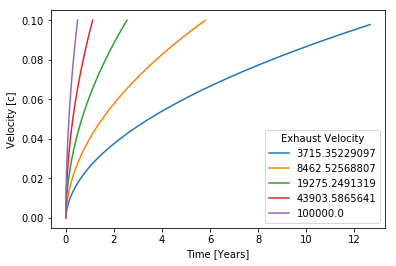

In [21]:
pyplot.figure(2)

a_time = numpy.zeros(len(v_e_vals))   # an array to store the times it takes the craft to rech 0.1c

for i in range(len(v_e_vals)):
    y = numpy.trim_zeros(v_ve[i,:])
    x = t_ve[i,:len(y)]
    
    a_time[i] = x[-1]
    
    pyplot.plot(x / YEAR_S, y / c, label = str(v_e_vals[i]))

pyplot.xlabel('Time [Years]')
pyplot.ylabel('Velocity [c]')
pyplot.legend(title = 'Exhaust Velocity' )

pyplot.show()

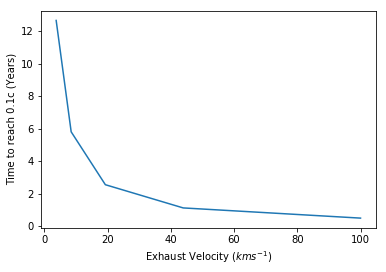

In [22]:
pyplot.plot(v_e_vals / 1000, a_time / YEAR_S)
pyplot.xlabel('Exhaust Velocity ($kms^{-1}$)')
pyplot.ylabel('Time to reach 0.1c (Years)')
pyplot.show()

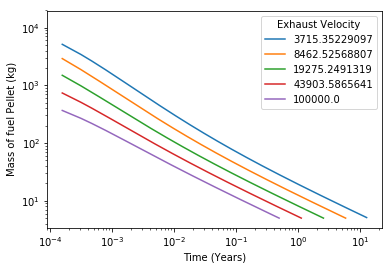

In [23]:
pyplot.figure(3)
    
for i in range(len(v_e_vals)):
    y = m_fuel_ve[i,:]
    x = t_ve[i,:]
    
    pyplot.loglog(x / YEAR_S , y, label = str(v_e_vals[i]))

pyplot.xlabel('Time (Years)')
pyplot.ylabel('Mass of fuel Pellet (kg)')
pyplot.legend(title = 'Exhaust Velocity' )

pyplot.show()


## Section IV - Continuum Model

In this section the above two models are turned into a continuous model.

For a description of how this is done, see http://localhost:8888/notebooks/Wording%20the%20Problem.ipynb

In [24]:
from scipy.integrate import odeint
import numpy

F_L = 2 * P_0_val / c
m_0 = m_spacecraft
v_e = 3700
v_0_receding = 11.3e3
T_W = 180

tau = T_W * g
P_s = v_e * F_L

def dU_dt(U, t):  # EoM of the catcher
    #Here U is a vector such that x = U[0] and z = dx_dt = U[1]. This function should return [dx_dt, d2x_dt2]
    return[U[1], tau * (1 - m_0 * U[1]**3 / ( P_s * U[0]))]

# have define the position here such that the inital acceleration is zero
U0 = [v_0_receding**3 * m_0 / P_s , v_0_receding]        # Will need to discuss the model's sensitivity to initial conditions - What happens at x = 0?   
ts = numpy.linspace(1, a_time[0], 1e7)   # discuss convergence
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]
vs = Us[:,1]


C:\Users\user\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


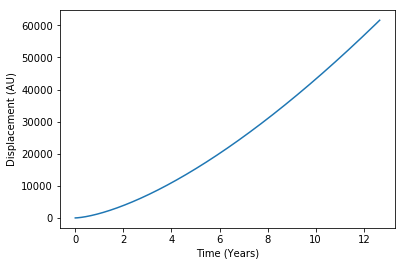

In [25]:
import matplotlib.pyplot as pyplot

pyplot.figure(1)

pyplot.plot(ts / YEAR_S , xs / AU)
pyplot.xlabel('Time (Years)')
pyplot.ylabel('Displacement (AU)')

pyplot.show()

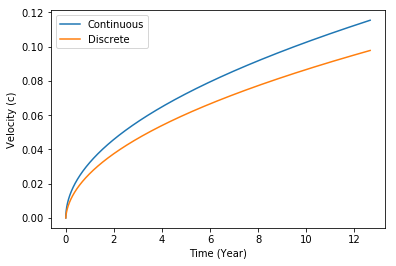

In [26]:
pyplot.figure(2)

pyplot.plot(ts / YEAR_S, vs / c, label = 'Continuous' )

vs_c = vs < 0.1 * c
vs_c = vs[vs_c]
t_c = ts[len(vs_c)] / YEAR_S    # the time it takes the craft to reach 0.1c in the continuous model.


pyplot.plot(t_ve[0,:len(numpy.trim_zeros(v_ve[0,:]))] / YEAR_S, numpy.trim_zeros(v_ve[0,:]) / c, label = 'Discrete')

'''
P_0_val = int(P_0_val)
a_starshot = starshot(P_0_val, 200.0)[3] 
ts_starshot = numpy.linspace(0, 0.01*YEAR_S, 100)
vs_starshot = numpy.linspace(0, a_starshot * 0.01 *YEAR_S, len(ts_starshot)) 

pyplot.plot(ts_starshot / YEAR_S, vs_starshot / c)
'''

pyplot.xlabel('Time (Year)')
pyplot.ylabel('Velocity (c)')
pyplot.legend()

pyplot.show()

__No Time Mapping__

Below is the model in which there is no time mapping. 

In [27]:
def dV_dt(V, t):  # EoM of the catcher with the launcher right next to the catcher - no time mapping 
    #Here U is a vector such that x = U[0] and z = x dot = U[1]. This function should return [x dot, x double dot]
    return[V[1], tau / ( 1 + (tau * m_0 / (v_e * F_L) ) * V[1])]

V_0 = [0, 0]
Vs = odeint(dV_dt, V_0, ts)
V_xs = Vs[:,0]
V_vs = Vs[:,1]

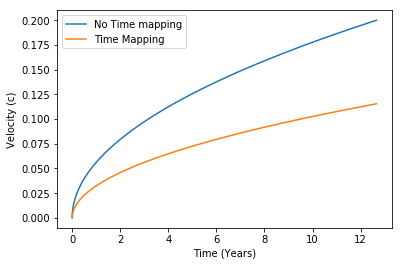

In [28]:
pyplot.plot(ts / YEAR_S , V_vs / c, label = 'No Time mapping')
pyplot.plot(ts / YEAR_S, vs / c, label = 'Time Mapping')

pyplot.xlabel('Time (Years)')
pyplot.ylabel('Velocity (c)')
pyplot.legend()

pyplot.show()

In [31]:
no_points = int(len(ts) / 100)

t_small = numpy.zeros(no_points)
accels = numpy.zeros(no_points)

for i in range(no_points):
    t = ts[100 * i]
    x = xs[100 * i]
    v = vs[100 * i]
    U = numpy.array([x, v])
    
    t_small[i] = t
    accels[i] = dU_dt(U, t)[1]
    

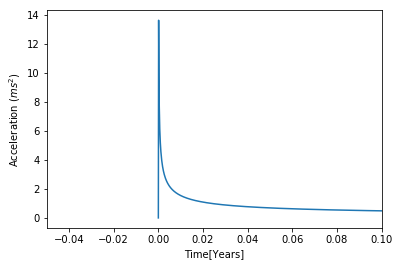

In [32]:
pyplot.plot(t_small / YEAR_S, accels)
pyplot.xlabel('Time[Years]')
pyplot.ylabel('Acceleration $(ms^2)$')
pyplot.xlim(-0.05,0.1)

pyplot.show()

ValueError: x and y must have same first dimension, but have shapes (1L,) and (100000L,)

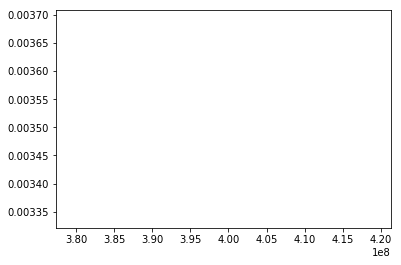

In [37]:
# dm_dt_l

xs_short = numpy.zeros(no_points)
vs_short = numpy.zeros(no_points)
ts_short = numpy.zeros(no_points)

for i in range(no_points):
    xs_short = xs[100 * i]
    vs_short = vs[100 * i]
    ts_short = ts[100 * i]
    

dm_dt_l = F_L / vs_short

dm_dt_c = F_L * accels * xs_short / vs_short**3

pyplot.plot(ts_short, dm_dt_l, label = '$\frac{dm}{dt_l}$')
pyplot.plot(ts_short, dm_dt_c, label = '$\frac{dm}{dt_c}$')
pyplot.legend()

pyplot.show()

In [ ]:
m_sc = m_0 + v_e * dm_dt_c / tau

pyplot.plot(ts, m_sc)

pyplot.show()

## PLOTS

In [ ]:
t_small = numpy.zeros(no_points)
accels = numpy.zeros(no_points)

for i in range(no_points):
    t = ts[100 * i]
    x = xs[100 * i]
    v = vs[100 * i]
    U = numpy.array([x, v])
    
    t_small[i] = t
    accels[i] = dU_dt(U, t)[1]
    

In [ ]:
pyplot.figure()

pyplot.plot(t_small / YEAR_S, accels)
pyplot.xlabel('Time[Years]')
pyplot.ylabel('Acceleration $(ms^2)$')

pyplot.show()

In [ ]:
pyplot.plot(t_small / YEAR_S, accels)
pyplot.xlabel('Time[Years]')
pyplot.ylabel('Acceleration $(ms^2)$')
pyplot.xlim(-0.05,0.1)

pyplot.show()

In [ ]:
accels[1], t_small[-1] / YEAR_S, ts[-1] / YEAR_S

__BIN__



m_engine_frac = [ (m_engine) / (m_engine + m_fuel + m_spacecraft) ]
m_fuel_frac = [ (m_fuel) / (m_engine + m_fuel + m_spacecraft) ]
m_spacecraft_frac = [ (m_spacecraft) / (m_engine + m_fuel + m_spacecraft)]

m_engine_frac.append(m_engine / (m_engine + m_fuel + m_spacecraft)) 
m_fuel_frac.append( m_fuel / (m_engine + m_fuel + m_spacecraft)) 
m_spacecraft_frac.append( m_spacecraft / (m_engine + m_fuel + m_spacecraft)) 

N = 45000 / 2
L = 45000 - 1

print N
print L

m_engine_frac_plt = m_engine_frac[0:L:643]
m_fuel_frac_plt = m_fuel_frac[0:L:643]
m_spacecraft_frac_plt = m_spacecraft_frac[0:L:643]

ind = numpy.arange(N)    # the x locations for the groups
width = len       # the width of the bars: can also be len(x) sequence

p1 = pyplot.bar(ind, m_spacecraft_frac_plt, width)
p2 = pyplot.bar(ind, m_fuel_frac_plt, width, bottom = m_spacecraft_frac_plt)
p3 = pyplot.bar(ind, m_engine_frac_plt, width, bottom = m_spacecraft_frac_plt + m_fuel_frac_plt)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
#plt.xticks(ind, ('t/5', '', 'G3', 'G4', 'G5'))
plt.yticks(numpy.arange(0, 1.1, 10))
plt.legend((p1[0], p2[0], p3[0]), ('m_spacecraft', 'm_fuel', 'm_engine'))
